In [1]:
#Comandos para importar as bibliotecas que serão utilizadas

import pandas as pd
from pandas import Series, DataFrame

import folium
from folium import plugins

import seaborn as sb
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
#Comandos para ler os dados de furtos que serão utilizados e que estão na pasta data.

path = 'data/'
startName = 'furtos_'
filenames = {'janeiro','fevereiro','marco','abril','maio','junho','julho','agosto','setembro'}
extension = '.csv'
encoding = "ISO-8859-1"
sep=';'

In [3]:
#Comandos para gerar um dataframe com todos os arquivos lidos

def populaDataFrame():
    dfList = list()

    for file in filenames:
        df= pd.DataFrame(pd.read_csv(path+startName+file+extension, encoding = encoding, sep = sep))
        dfList.append(df)

    df = pd.concat(dfList)
    return df

In [4]:
df = populaDataFrame()
df.reset_index()

,index,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,NOMEPESSOA,TIPOPESSOA,VITIMAFATAL,RG,RG_UF,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,0,2018,430169,430169/2018,01/04/2018 2:23,01/04/2018 2:23,31/03/2018,A NOITE,01/04/2018,01/04/2018 2:23,Desconhecida,Não,NaN,AVENIDA PADRE MOACIR RODRIGUES,68.0,NaN,CACAPAVA,SP,-23.106149,-45.684586,Outros,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,DEL.POL.CACAPAVA,Título II - Patrimônio (arts. 155 a 183),Furto (art. 155) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2018,629,629/2018,02/04/2018 13:14,02/04/2018 13:25,02/04/2018,PELA MANHÃ,02/04/2018,02/04/2018 13:14,Desconhecida,Não,NaN,AVENIDA FEIRA DE SANTANA,330.0,JARDIM VALE DO SOL,S.JOSE DOS CAMPOS,SP,-23.256840,-45.911566,Via pública,NaN,APRECIAÇÃO DO DELEGADO TITULAR,03º D.P. S.JOSE DOS CAMPOS,03º D.P. S.JOSE DOS CAMPOS,Título II - Patrimônio (arts. 155 a 183),Furto (art. 155) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CSM1846,SP,S.SEBASTIAO,Azul,VW/PARATI S,1985.0,1986.0,AUTOMOVEL,NaN,NaN
2,2,2018,435438,435438/2018,02/04/2018 14:48,02/04/2018 14:48,02/04/2018,PELA MANHÃ,02/04/2018,02/04/2018 14:48,Desconhecida,Não,NaN,R. VÍRGEM,450.0,NaN,S.JOSE DOS CAMPOS,SP,-23.225968,-45.886104,Outros,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,07º D.P. S.JOSE DOS CAMPOS,Título II - Patrimônio (arts. 155 a 183),Furto (art. 155) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2018,634,634/2018,02/04/2018 18:12,02/04/2018 18:22,02/04/2018,A TARDE,02/04/2018,02/04/2018 18:12,Desconhecida,Não,NaN,RUA CARAVELAS,165.0,PARQUE INDEPENDÊNCIA,S.JOSE DOS CAMPOS,SP,-23.255029,-45.918460,Via pública,NaN,APRECIAÇÃO DO DELEGADO TITULAR,03º D.P. S.JOSE DOS CAMPOS,03º D.P. S.JOSE DOS CAMPOS,Título II - Patrimônio (arts. 155 a 183),Furto (art. 155) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CBO7882,SP,S.JOSE DOS CAMPOS,Cinza,FIAT/FIAT UNO S,1989.0,1989.0,AUTOMOVEL,NaN,NaN
4,4,2018,336,336/2018,03/04/2018 9:11,03/04/2018 9:46,28/03/2018,PELA MANHÃ,03/04/2018,03/04/2018 9:11,Desconhecida,Não,NaN,RUA MARIO SCHOLZ,182.0,VILA DIRCE,S.JOSE DOS CAMPOS,SP,-23.158466,-45.914319,Via pública,NaN,APRECIAÇÃO DO DELEGADO TITULAR,04º D.P. S.JOSE DOS CAMPOS,04º D.P. S.JOSE DOS CAMPOS,Localização e/ou Devolução,Localização/Apreensão e Entrega de veículo,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
5,5,2018,492,492/2018,03/04/2018 17:12,03/04/2018 17:46,03/04/2018,PELA MANHÃ,03/04/2018,03/04/2018 17:12,Desconhecida,Não,NaN,RUA DAS CIGARRAS,70.0,JARDIM SATÉLITE,S.JOSE DOS CAMPOS,SP,-23.225422,-45.883892,Via pública,NaN,APRECIAÇÃO DO DELEGADO TITULAR,07º D.P. S.JOSE DOS CAMPOS,07º D.P. S.JOSE DOS CAMPOS,Título II - Patrimônio (arts. 155 a 183),Furto (art. 155) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MTU7809,SP,CAMPINAS,Prata,I/FIAT SIENA EL FLEX,2010.0,2011.0,AUTOMOVEL,NaN,NaN
6,6,2018,1136,1136/2018,03/04/2018 19:48,03/04/2018 20:00,03/04/2018,PELA MANHÃ,03/04/2018,03/04/2018 19:48,Desconhecida,Não,NaN,RUA ROMEU CARNEVALLI,234.0,JARDIM BELA VISTA,S.JOSE DOS CAMPOS,SP,-23.178250,-45.886586,Via pública,NaN,APRECIAÇÃO DO DELEGADO TITULAR,DEL.SEC.POL.SJCAMPOS PL CENTRO,01º D.P. S.JOSE DOS CAMPOS,Título II

In [5]:
#Comando para criar um novo dataframe e armazena-lo em uma variável com os dados que utilizaremos para gerar um mapa de calor
geolocalizacoes = df[['LATITUDE', 'LONGITUDE']]

In [6]:
#Comando para identificar os valores nulos armazenados na variável
geolocalizacoes.isnull().sum()

LATITUDE     404
LONGITUDE    404
dtype: int64

In [7]:
#Comando para remover os valores nulos
geolocalizacoes.dropna(inplace=True)

c:\users\felip\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
#Comandos para gerar um mapa de calor com os dados da variável criada a partir das latitudes e longitutes fornecidas pelos dados das planilhas, utilizando a biblioteca folium.
#Créditos a Guilherme Faria https://github.com/guilhermeFaria/Data-Analysis-stolen-cars

coordenadas = []
lat = geolocalizacoes['LATITUDE'].values

long = geolocalizacoes['LONGITUDE'].values

mapa = folium.Map(location=[-23.1791, -45.8872],tiles='OpenStreetMap',zoom_start=12)
 
for la,lo in zip(lat,long):
    coordenadas.append([la,lo])
    
mapa.add_child(plugins.HeatMap(coordenadas))

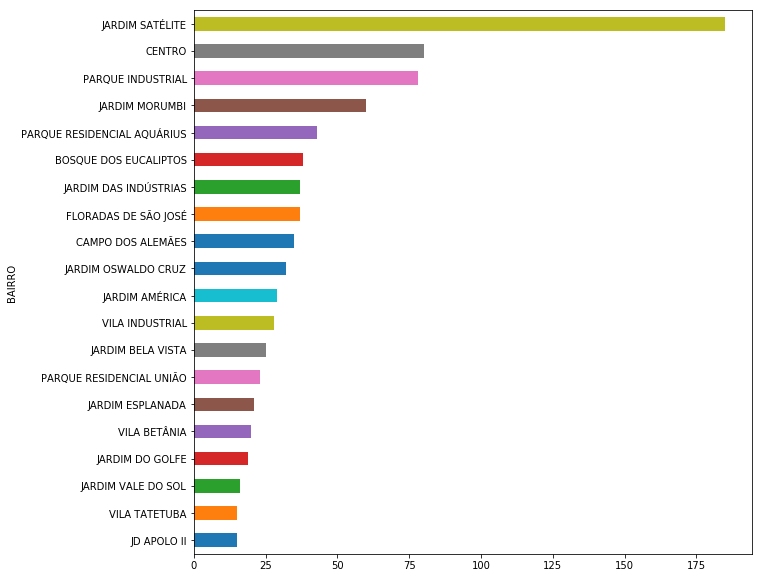

In [11]:
#Comando para gerar um gráfico dos bairros com os maiores índices de furtos na região

df.groupby('BAIRRO').size().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

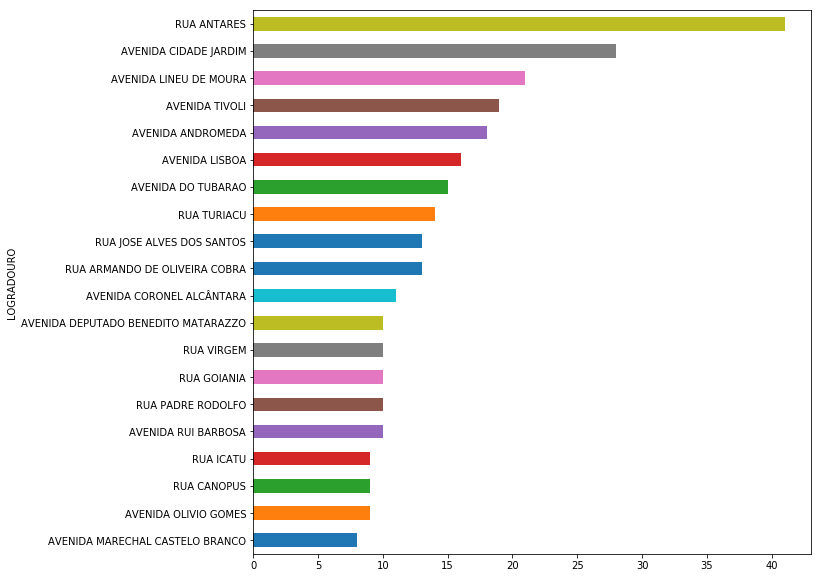

In [12]:
#Comando para gerar um gráfico das ruas com os maiores índices de furtos na região

df.groupby('LOGRADOURO').size().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

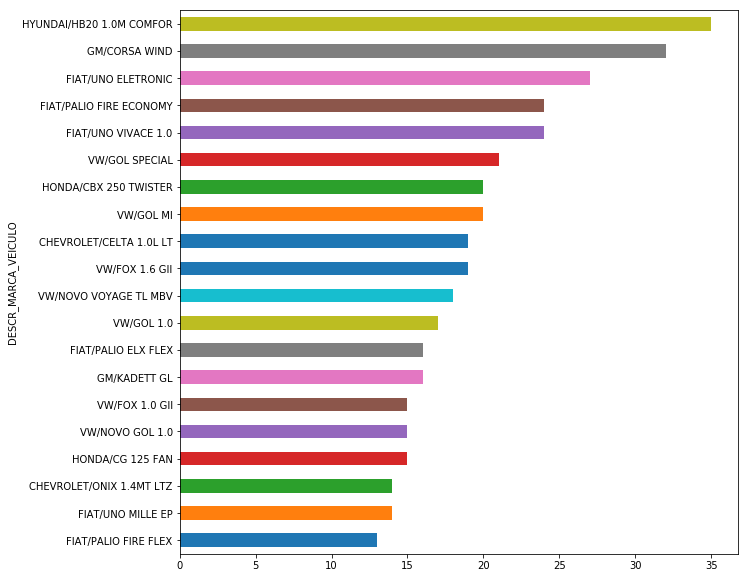

In [13]:
#Comando para gerar um gráfico dos modelos de carros com os maiores índices de furtos na região

df.groupby('DESCR_MARCA_VEICULO').size().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

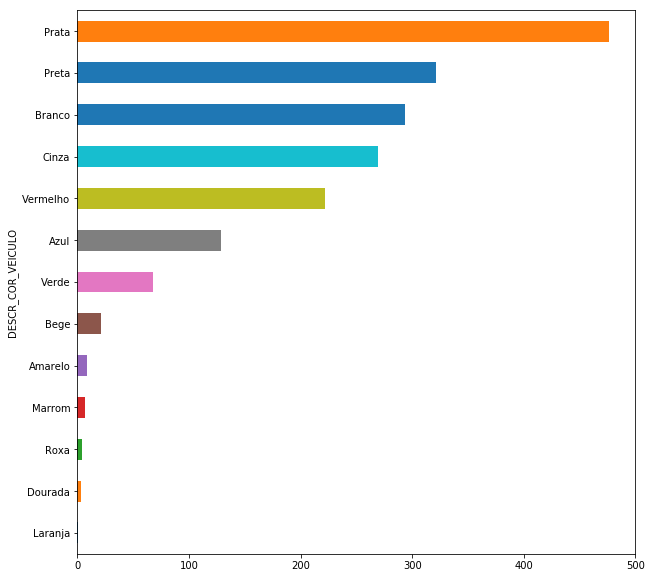

In [16]:
#Comando para gerar um gráfico das cores de veículos com os maiores índices de furtos na região

df.groupby('DESCR_COR_VEICULO').size().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

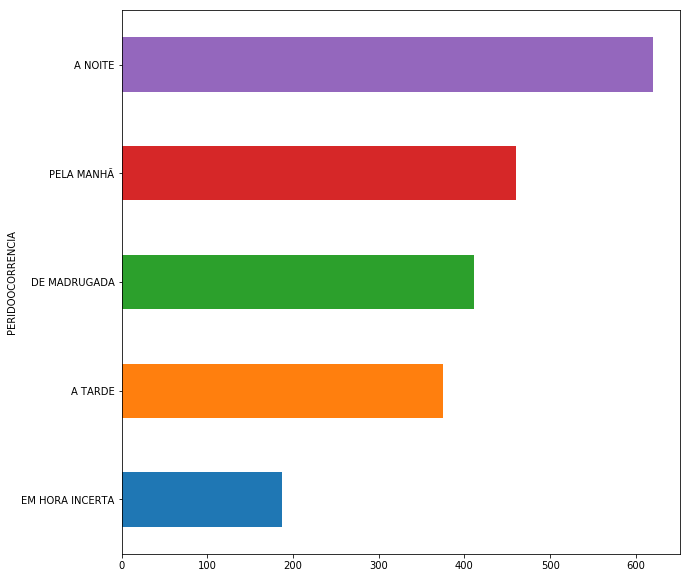

In [17]:
#Comando para gerar um gráfico dos períodos com os maiores índices de furtos na região

df.groupby('PERIDOOCORRENCIA').size().sort_values().tail(10).plot(kind='barh', figsize=(10,10))